In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4RandomForestSingleOutputRegressor,106,24,shap,0.000287,0.002015,0.018361,0.000991,0.004577,0.001189,...,0.000757,0.001988,0.000562,0.000851,0.000615,0.000556,0.000531,0.000268,0.001002,0.004303
1,M4RandomForestRegressor,256,18,shap,0.000317,0.001942,0.012493,0.011043,0.004097,0.000878,...,0.001728,0.001991,0.000624,0.000698,0.000620,0.001001,0.000437,0.000242,0.001335,0.003058
2,M4DummyMeanRegression,243,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4XGBRegressor,Theta,12,shap,0.000323,0.004803,0.021700,0.005030,0.010489,0.003052,...,0.001464,0.002437,0.000644,0.001199,0.000615,0.000623,0.001130,0.000292,0.004180,0.004436
4,M4XGBRegressor,078,15,shap,0.000292,0.003989,0.016970,0.004807,0.007605,0.002599,...,0.001631,0.002586,0.002034,0.000746,0.000962,0.000693,0.000944,0.000313,0.001133,0.004712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29275,M4RandomForestRegressor,sNaive,3,shap,0.000301,0.002060,0.014822,0.004195,0.004892,0.001004,...,0.001740,0.002312,0.000698,0.000619,0.000663,0.001930,0.000674,0.000306,0.000878,0.002781
29276,M4DummyMeanRegression,078,6,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29277,M4XGBRegressor,219,12,shap,0.000586,0.003147,0.021873,0.015610,0.003692,0.006103,...,0.001454,0.004581,0.002105,0.001643,0.001271,0.000663,0.001361,0.000529,0.003244,0.004665
29278,M4DummyMeanRegression,126,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
figures_directory = 'figures'

In [4]:
df['ml_algorithm'].unique()

array(['M4RandomForestSingleOutputRegressor', 'M4RandomForestRegressor',
       'M4DummyMeanRegression', 'M4XGBRegressor',
       'M4KerasNetRegressionModel'], dtype=object)

In [5]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [6]:
dfr = feature_importance_to_feature_rank(df, feature_columns)

In [7]:
dfr.query(f'ml_algorithm == "M4XGBRegressor"')

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
3,M4XGBRegressor,Theta,12,shap,9.0,54.0,63.0,55.0,59.0,50.0,...,38.0,49.0,20.0,32.0,17.0,18.0,29.0,5.0,52.0,53.0
4,M4XGBRegressor,078,15,shap,6.0,51.0,62.0,54.0,57.0,48.0,...,43.0,47.0,45.0,20.0,28.0,17.0,27.0,7.0,33.0,53.0
6,M4XGBRegressor,212,26,shap,5.0,52.0,63.0,54.0,59.0,51.0,...,37.0,50.0,27.0,33.0,24.0,26.0,21.0,7.0,36.0,55.0
10,M4XGBRegressor,248,13,shap,8.0,54.0,62.0,53.0,60.0,52.0,...,35.0,47.0,36.0,18.0,28.0,27.0,19.0,16.0,40.0,55.0
12,M4XGBRegressor,sNaive,1,shap,10.0,55.0,63.0,56.0,58.0,49.0,...,25.0,42.0,18.0,39.0,19.0,45.0,23.0,11.0,43.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,M4XGBRegressor,236,11,shap,13.0,54.0,62.0,52.0,55.0,51.0,...,32.0,47.0,36.0,22.0,21.0,20.0,23.0,14.0,35.0,56.0
29270,M4XGBRegressor,250,25,shap,6.0,54.0,62.0,52.0,60.0,48.0,...,34.0,46.0,22.0,26.0,28.0,33.0,21.0,13.0,45.0,55.0
29271,M4XGBRegressor,070,28,shap,11.0,47.0,63.0,55.0,62.0,42.0,...,32.0,54.0,30.0,36.0,21.0,53.0,18.0,3.0,35.0,46.0
29273,M4XGBRegressor,223,11,shap,8.0,54.0,62.0,52.0,57.0,47.0,...,34.0,49.0,30.0,36.0,15.0,22.0,24.0,14.0,43.0,55.0


In [8]:
gdfr = dfr.query(f'ml_algorithm == "M4XGBRegressor"').groupby(['feature_importance_method', 'ml_algorithm']).mean().reset_index()

In [9]:
gdfr

,feature_importance_method,ml_algorithm,run,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,value__first_location_of_maximum,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,permutation,M4XGBRegressor,15.5,9.215574,56.040984,62.806011,56.960656,58.122404,49.325683,50.595628,...,41.212022,49.676503,25.389617,32.660109,22.492350,21.581967,25.434973,11.816393,43.000546,49.586339
1,shap,M4XGBRegressor,15.5,9.664481,52.130055,62.418579,54.009290,58.404918,49.125683,49.532787,...,35.616940,46.958470,25.563388,26.723497,21.823497,27.684699,25.221311,10.677596,40.660656,52.183607
2,xgboost-cover,M4XGBRegressor,15.5,9.125956,23.742077,39.168306,43.255738,29.998361,45.389071,40.606557,...,48.454098,52.801639,43.365574,35.446448,26.372678,38.227322,46.902732,44.548087,30.332787,39.840984
3,xgboost-gain,M4XGBRegressor,15.5,8.498907,26.233333,54.201639,49.395628,54.774317,40.094536,41.042623,...,38.614208,53.400000,24.193989,29.797814,24.687432,42.063388,48.169399,22.778415,36.822404,53.219126
4,xgboost-total_cover,M4XGBRegressor,15.5,10.146721,61.257377,62.337705,54.865027,48.634426,55.418033,49.798361,...,55.632787,61.143169,37.290164,32.083060,26.911475,24.914754,26.909836,15.193169,28.065027,45.382514
5,xgboost-total_gain,M4XGBRegressor,15.5,14.019126,54.063388,60.466667,53.236612,55.904372,49.392350,47.791803,...,48.113661,56.459016,26.087978,27.290164,24.681421,28.397814,28.486885,13.694262,28.720765,51.893989
6,xgboost-weight,M4XGBRegressor,15.5,18.291257,62.945628,62.008197,56.693443,56.869126,55.823224,50.512568,...,53.992623,60.487158,29.120219,27.801366,27.108470,21.681694,20.866667,13.518033,26.089344,43.593443


In [10]:
#gdfr[feature_columns].mean(axis=0)
features_sorted = gdfr.query(f'feature_importance_method == "permutation"')[feature_columns].mean(axis=0).sort_values(ascending=True).keys()

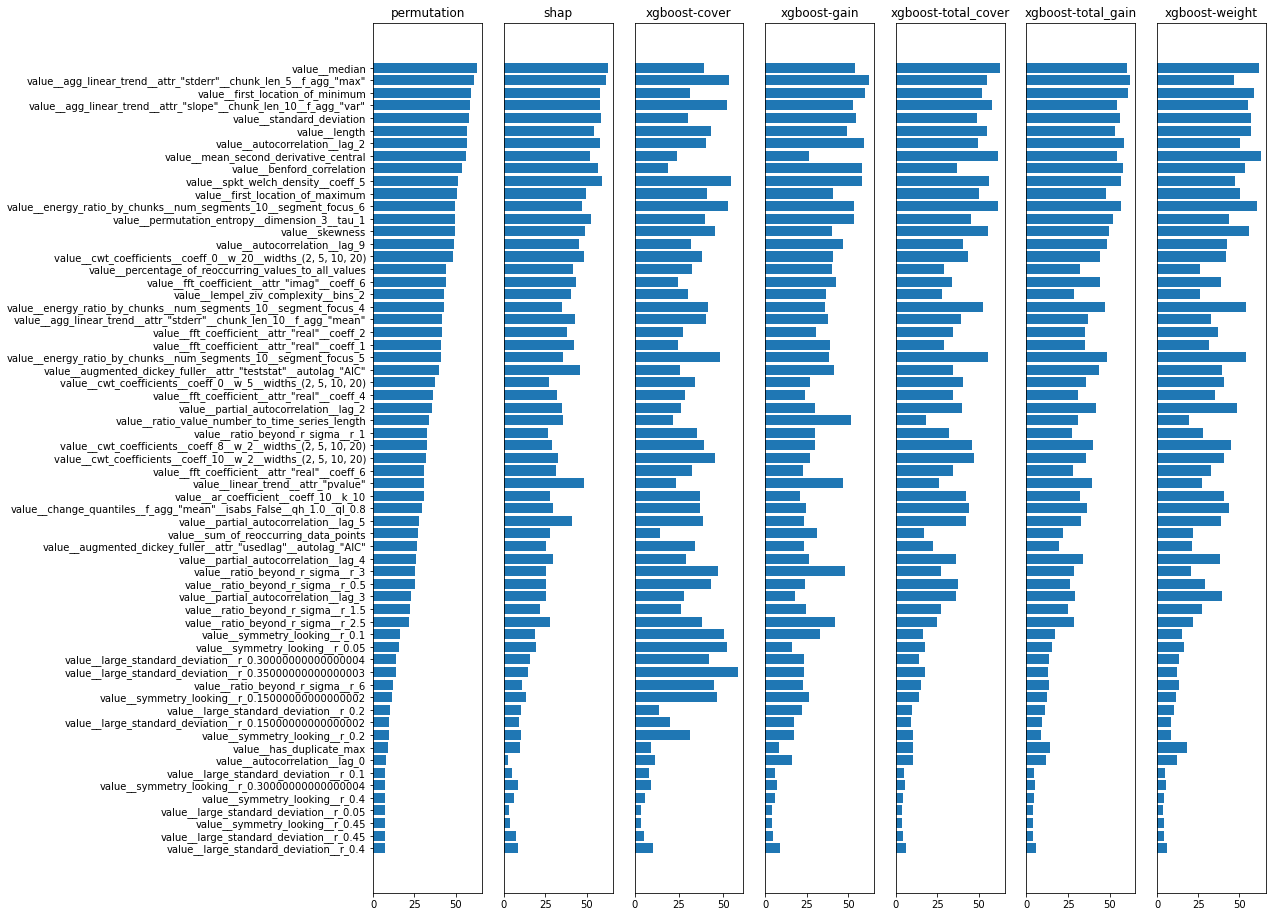

In [11]:
fig, axes = plt.subplots(1, len(gdfr), figsize=(16, 16))

for i, (index, row) in enumerate(gdfr.iterrows()):
    #print()
    fe_name = row['feature_importance_method']
    #feature_list, ranking_list = best_features, [row[x] for x in best_features]
    axes[i].barh(features_sorted, row[features_sorted].tolist())
    axes[i].set_title(fe_name)
    if i>0:
        axes[i].get_yaxis().set_visible(False)
        
plt.savefig(f'{figures_directory}/feature_importance_fixed_xgboost.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
l = dfr.melt(id_vars=static_columns, var_name="feature", value_name="importance").groupby(['feature_importance_method','ml_algorithm', 'feature']).agg({'importance':'mean'}).reset_index()

In [13]:
l

,feature_importance_method,ml_algorithm,feature,importance
0,permutation,M4DummyMeanRegression,"value__agg_linear_trend__attr_""slope""__chunk_l...",32.000000
1,permutation,M4DummyMeanRegression,"value__agg_linear_trend__attr_""stderr""__chunk_...",32.000000
2,permutation,M4DummyMeanRegression,"value__agg_linear_trend__attr_""stderr""__chunk_...",32.000000
3,permutation,M4DummyMeanRegression,value__ar_coefficient__coeff_10__k_10,32.000000
4,permutation,M4DummyMeanRegression,"value__augmented_dickey_fuller__attr_""teststat...",32.000000
...,...,...,...,...
1003,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.15000000000000002,11.476230
1004,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.2,8.209563
1005,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.30000000000000004,5.156284
1006,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.4,4.469945


In [14]:
df2 = l.query(f'ml_algorithm == "M4XGBRegressor"').groupby(['feature_importance_method', 'feature'])['importance'].mean().unstack().T.reset_index()
df2

feature_importance_method,feature,permutation,shap,xgboost-cover,xgboost-gain,xgboost-total_cover,xgboost-total_gain,xgboost-weight
0,"value__agg_linear_trend__attr_""slope""__chunk_l...",58.380874,58.143716,52.081421,52.937158,57.935519,54.108197,55.430601
1,"value__agg_linear_trend__attr_""stderr""__chunk_...",41.693443,42.584153,40.142623,37.744809,39.135519,37.149727,32.833333
2,"value__agg_linear_trend__attr_""stderr""__chunk_...",60.767213,61.653005,53.492350,62.347541,54.731148,62.113115,46.413934
3,value__ar_coefficient__coeff_10__k_10,30.503279,27.677596,36.990164,20.765027,42.259016,32.249727,40.400273
4,"value__augmented_dickey_fuller__attr_""teststat...",40.056831,45.961202,25.528962,41.572678,34.512568,43.616393,39.586066
...,...,...,...,...,...,...,...,...
58,value__symmetry_looking__r_0.15000000000000002,11.225410,13.550273,46.237432,26.350546,13.666940,12.528689,11.476230
59,value__symmetry_looking__r_0.2,9.596448,10.318033,31.377869,17.322404,10.333060,8.712568,8.209563
60,value__symmetry_looking__r_0.30000000000000004,7.393443,8.668852,9.260656,7.300546,5.725683,5.267760,5.156284
61,value__symmetry_looking__r_0.4,7.212022,6.274590,5.950000,5.900820,4.606831,4.578415,4.469945


In [15]:
def plotify_df(df):
    df = df.copy(deep=True)
    d = get_feature_name_map()
    df['feature'] = df['feature'].map(d)
    return df

df2 = df2.pipe(plotify_df)

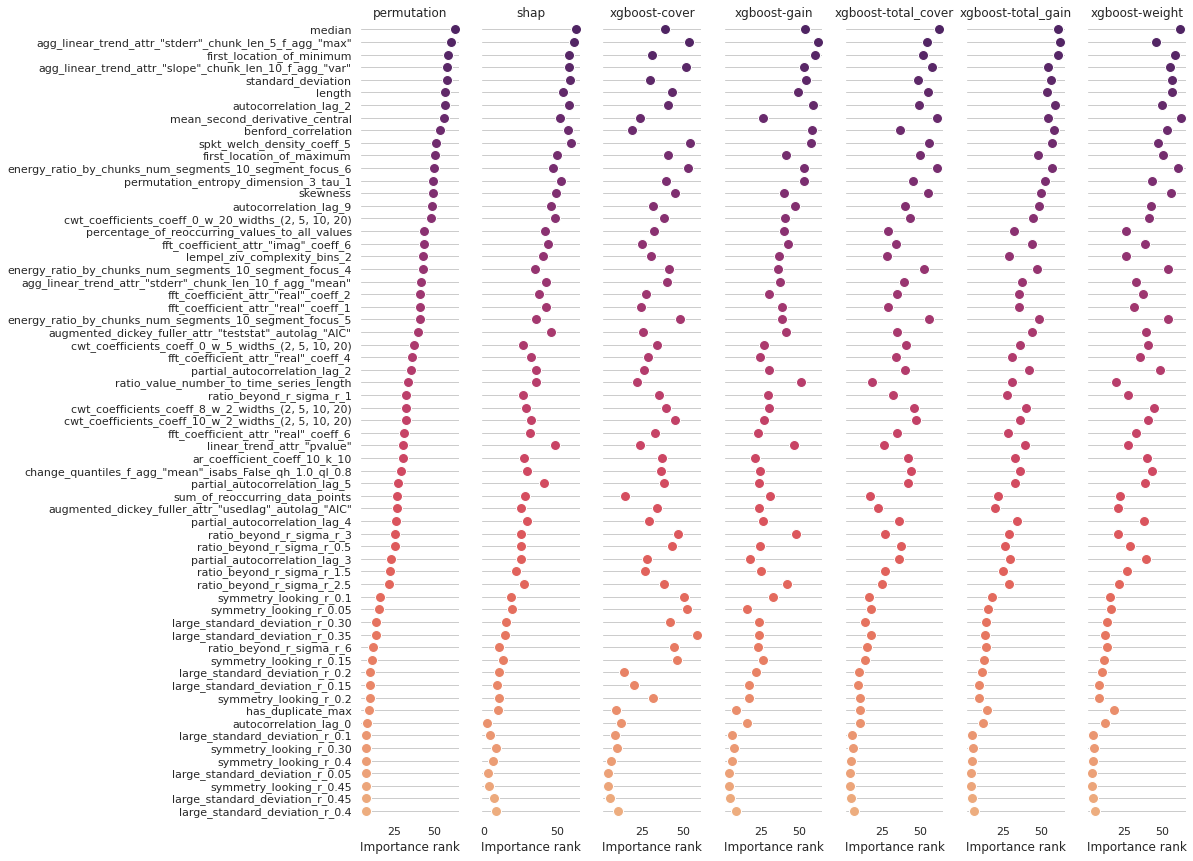

In [16]:
sns.set_theme(style="whitegrid")

# Use semantically meaningful titles for the columns
titles = ['permutation', 'shap', 'xgboost-cover', 'xgboost-gain', 'xgboost-total_cover', 'xgboost-total_gain', 'xgboost-weight']

# Make the PairGrid
g = sns.PairGrid(df2.sort_values(by="permutation", ascending=False),
                 x_vars=titles, y_vars=["feature"],
                 height=12, aspect=.15)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Importance rank", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig(f'{figures_directory}/feature_importance_fixed_xgboost.pdf', bbox_inches='tight', pad_inches=0)